# Radom bcc alloy

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt

from lammps_implicit_der.systems import BccBinary
from lammps_implicit_der import SNAP


## Define a non-perturbed random alloy system

In [64]:
# Check if the bcc_random.data file exists
datafilename = 'bcc_random.data'
datafile = datafilename if os.path.exists(datafilename) else None

#datafile = None

bcc_alloy_non_perturb = BccBinary(datafile=datafile,
                                  snapcoeff_filename='NiMo.snapcoeff',
                                  num_cells=3,
                                  specie_B_concentration=0.5,
                                  minimize=True)

if datafile is None:
    bcc_alloy_non_perturb.write_data(datafilename)

None
Running LAMMPS with the following arguments:
-screen none -log none
Reading datafile bcc_random.data
Number of atoms: 54, largest force value: 1.788e-09, force norm: 7.386e-09


In [11]:
print(bcc_alloy_non_perturb.cell)
print(bcc_alloy_non_perturb.species)

[[9.39 0.   0.  ]
 [0.   9.39 0.  ]
 [0.   0.   9.39]]
[1 1 1 2 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 1 2 2 2 1 1 1 1 2 2 1 2 2 1 2 2 2
 2 2 2 1 1 1 2 1 1 1 2 1 2 1 1 2 2]


## SNAP potential parameters perturbation

In [13]:
print(bcc_alloy_non_perturb.pot.Theta_dict['Mo'])

{'elem_params': {'radius': 0.575, 'weight': 1.0}, 'beta0': -11.1413071988, 'Theta': array([ 0.00217993,  0.02117406,  0.05027489,  0.01271017,  0.32806724,
        0.06901471,  0.1782036 ,  0.00128021,  0.06856159,  0.02934277,
        0.0085863 , -0.00900972,  0.00302195,  0.02371238,  0.00319153,
        0.03359465,  0.06278455, -0.06161855, -0.02141344, -0.0348541 ,
        0.01435036,  0.00391291,  0.02266774, -0.02309605, -0.02843036,
        0.00857356,  0.00335881,  0.03927386, -0.00041452, -0.00370094])}


In [75]:
# Get the Mo Theta parameters
Theta_Mo = bcc_alloy_non_perturb.pot.Theta_dict['Mo']['Theta'].copy()

# Strongly perturb the Mo Theta parameters
delta = 10.0

dTheta = Theta_Mo * np.random.uniform(-1.0, 1.0, size=Theta_Mo.shape) * delta

Theta_Mo_perturb = Theta_Mo + dTheta

# Copy from the original potential
Theta_dict_perturb = bcc_alloy_non_perturb.pot.Theta_dict.copy()
Theta_dict_perturb['Mo']['Theta'] = Theta_Mo_perturb

snapparam_dict = bcc_alloy_non_perturb.pot.snapparam_dict.copy()
elem_list = bcc_alloy_non_perturb.pot.elem_list.copy()

# Define a SNAP instance with the perturbed parameters
perturbed_snap = SNAP(elem_list, Theta_dict_perturb, snapparam_dict)

# Save the perturbed SNAP coefficients to a file
snapcoeff_filename = 'NiMo_Mo_perturbed.snapcoeff'
snapparam_filename = 'NiMo_Mo_perturbed.snapparam'

# Do it once

today_is_the_day = True
#today_is_the_day = False

if today_is_the_day:
    perturbed_snap.to_files(path='.',
                            snapcoeff_filename=snapcoeff_filename,
                            snapparam_filename=snapparam_filename,
                            overwrite=True,
                            verbose=True)

Overwriting ./NiMo_Mo_perturbed.snapcoeff
Saved SNAP coefficients to ./NiMo_Mo_perturbed.snapcoeff
Saved SNAP parameters to ./NiMo_Mo_perturbed.snapparam


## Perturbed random alloy system

In [76]:
bcc_alloy_perturb = BccBinary(datafile=datafile,
                              data_path='.',
                              snapcoeff_filename='NiMo_Mo_perturbed.snapcoeff',
                              num_cells=3,
                              minimize=False)

None
Running LAMMPS with the following arguments:
-screen none -log none
Reading datafile bcc_random.data
Number of atoms: 54, largest force value: 7.505e+01, force norm: 2.086e+02


## Coordinates

[1 1 1 2 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 1 2 2 2 1 1 1 1 2 2 1 2 2 1 2 2 2
 2 2 2 1 1 1 2 1 1 1 2 1 2 1 1 2 2]


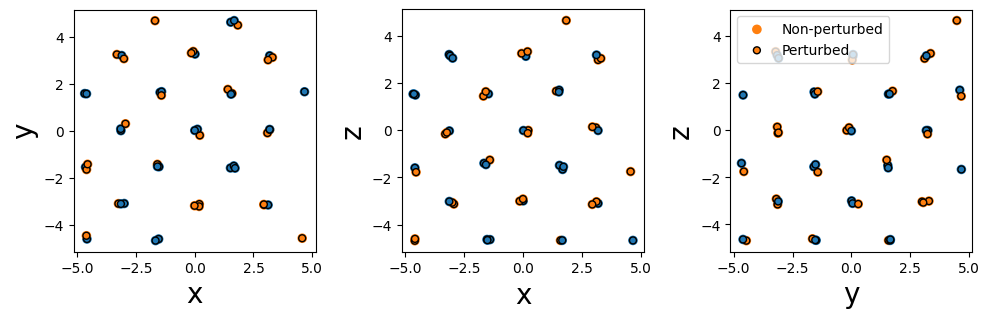

In [77]:
X0 = bcc_alloy_non_perturb.X_coord.reshape(-1, 3)
X1 = bcc_alloy_perturb.X_coord.reshape(-1, 3)

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

ax_labels = ['x', 'y', 'z']
ax_combs = [(0, 1), (0, 2), (1, 2)]
specie_color = {1: 'tab:orange', 2: 'tab:blue'}

colors = [specie_color[specie] for specie in bcc_alloy_non_perturb.species]

print(bcc_alloy_non_perturb.species)

for i, ax in enumerate(axes):
    ax.set_aspect('equal')
    ax.scatter(X0[:, ax_combs[i][0]], X0[:, ax_combs[i][1]], s=35, label='Non-perturbed', c=colors)
    ax.scatter(X1[:, ax_combs[i][0]], X1[:, ax_combs[i][1]], s=25, label='Perturbed', c=colors, edgecolors='black')
    ax.set_xlabel(ax_labels[ax_combs[i][0]], fontsize=20)
    ax.set_ylabel(ax_labels[ax_combs[i][1]], fontsize=20)

# tight layout
plt.tight_layout()

ax.legend()
plt.show()



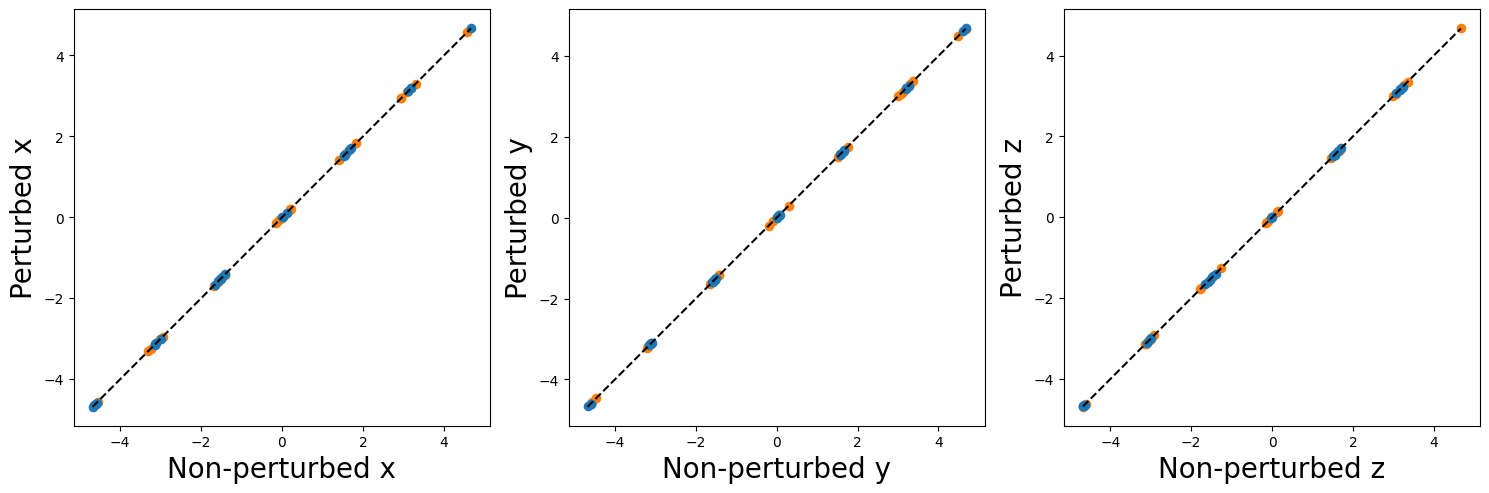

In [78]:
# Coordinates of species 1 and 2
X0_1 = X0[bcc_alloy_non_perturb.species == 1]
X0_2 = X0[bcc_alloy_non_perturb.species == 2]

X1_1 = X1[bcc_alloy_perturb.species == 1]
X1_2 = X1[bcc_alloy_perturb.species == 2]

# Plot X0 against X1
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ax_names = ['x', 'y', 'z']

for i, ax in enumerate(axes):
    ax.set_aspect('equal')
    ax.scatter(X0_1[:, i], X1_1[:, i], s=35, label='Species 1', color='tab:orange')
    ax.scatter(X0_2[:, i], X1_2[:, i], s=35, label='Species 2', color='tab:blue')
    ax.set_xlabel(f'Non-perturbed {ax_names[i]}', fontsize=20)
    ax.set_ylabel(f'Perturbed {ax_names[i]}', fontsize=20)

    ax.plot([np.min(X0[:, 0]), np.max(X0[:, 0])], [np.min(X0[:, 0]), np.max(X0[:, 0])], 'k--')


plt.tight_layout()
ax.set_aspect('equal')

## Potential difference

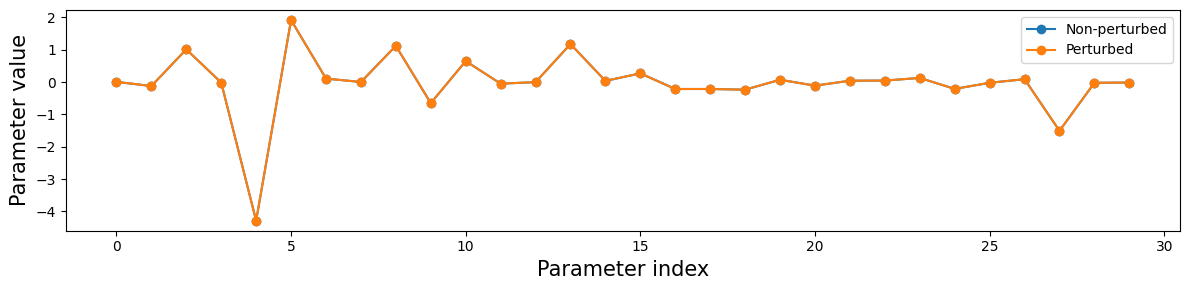

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))

ax.plot(bcc_alloy_non_perturb.pot.Theta_dict['Mo']['Theta'], marker='o', ls='-', label='Non-perturbed')
ax.plot(bcc_alloy_perturb.pot.Theta_dict['Mo']['Theta'], marker='o', ls='-', label='Perturbed')

ax.set_xlabel('Parameter index', fontsize=15)
ax.set_ylabel('Parameter value', fontsize=15)

plt.legend()
plt.tight_layout()
plt.show()